# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import requests
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
weather_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"
geo_url = f"http://api.openweathermap.org/geo/1.0/direct?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Create endpoint URL with each city
        geo_url_query = geo_url + f"&q={city}"
        geo_data = requests.get(geo_url_query).json()
        lattitude = geo_data[0]['lat']
        longitude = geo_data[0]['lon']

        # Parse the JSON and retrieve data
        city_url = weather_url + f"&lat={lattitude}&lon={longitude}"

        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.datetime.fromtimestamp(int(city_weather['dt'])).date()

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass


              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kolonia town
City not found. Skipping...
Processing Record 2 of Set 1 | calama
http://api.openweathermap.org/data/2.5/weather?appid=432a6b90328294ac2b77e34c66147e4b&lat=-22.4623917&lon=-68.9272181
Processing Record 3 of Set 1 | port-aux-francais
http://api.openweathermap.org/data/2.5/weather?appid=432a6b90328294ac2b77e34c66147e4b&lat=-49.3497607&lon=70.2199565
Processing Record 4 of Set 1 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=432a6b90328294ac2b77e34c66147e4b&lat=55.743347&lon=-97.863464
Processing Record 5 of Set 1 | kingston
http://api.openweathermap.org/data/2.5/weather?appid=432a6b90328294ac2b77e34c66147e4b&lat=17.9712148&lon=-76.7928128
Processing Record 6 of Set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=432a6b90328294ac2b77e34c66147e4b&lat=-15.9277296&lon=-5.7160872
Processing Record 7 of Set 1 | sergeyevka
http://api.openweathermap.org/data

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          532
Lat           532
Lng           532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,calama,-22.4624,-68.9272,294.37,8,0,7.72,CL,2023-07-29
1,port-aux-francais,-49.3498,70.2200,273.35,91,100,4.64,TF,2023-07-29
2,thompson,55.7433,-97.8635,298.25,41,100,7.72,CA,2023-07-29
3,kingston,17.9712,-76.7928,305.05,70,20,10.29,JM,2023-07-29
4,jamestown,-15.9277,-5.7161,291.04,73,100,12.60,SH,2023-07-29


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,calama,-22.4624,-68.9272,294.37,8,0,7.72,CL,2023-07-29
1,port-aux-francais,-49.3498,70.2200,273.35,91,100,4.64,TF,2023-07-29
2,thompson,55.7433,-97.8635,298.25,41,100,7.72,CA,2023-07-29
3,kingston,17.9712,-76.7928,305.05,70,20,10.29,JM,2023-07-29
4,jamestown,-15.9277,-5.7161,291.04,73,100,12.60,SH,2023-07-29


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

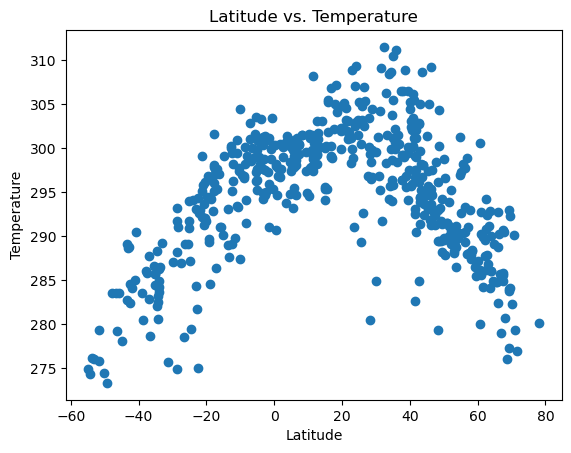

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

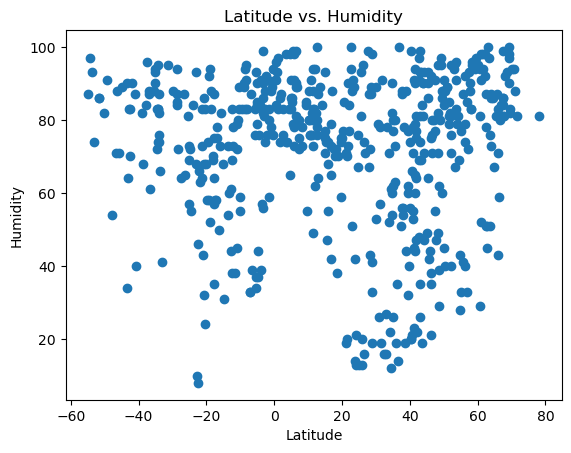

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

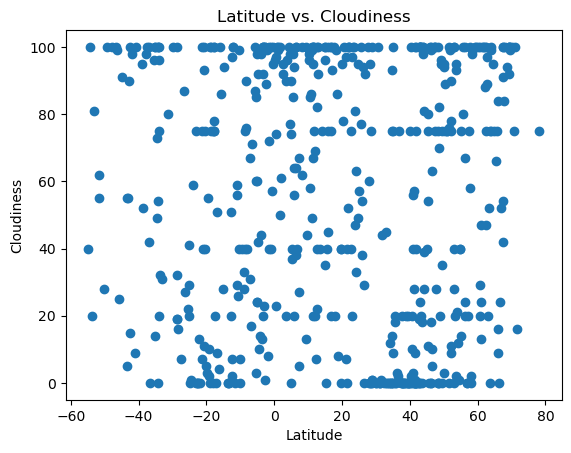

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

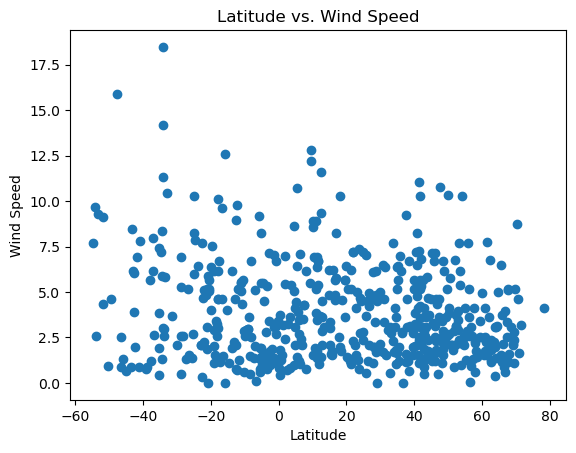

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
def regress(x, y, chart_title):
    regression = linregress(x,y)
    plt.plot(x, y, 'o', label='Data')
    plt.plot(x, regression.intercept + regression.slope * x, label='Line of Best Fit')
    plt.legend()
    plt.title(chart_title)
    m = round(regression.slope, 2)
    b = round(regression.intercept, 2)
    plt.figtext(x=0, y=0, s=f'Y = {m}X + {b}')
    plt.show()

    rvalue = regression.rvalue
    pvalue = regression.pvalue
    print(f"rvalue = {rvalue}\npvalue = {pvalue}")

In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,thompson,55.7433,-97.8635,298.25,41,100,7.72,CA,2023-07-29
3,kingston,17.9712,-76.7928,305.05,70,20,10.29,JM,2023-07-29
5,sergeyevka,53.8810,67.4159,289.76,79,21,2.19,KZ,2023-07-29
8,okha,53.5891,142.9498,286.49,91,93,5.39,RU,2023-07-29
9,akureyri,65.6839,-18.1122,284.81,87,75,1.54,IS,2023-07-29


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,calama,-22.4624,-68.9272,294.37,8,0,7.72,CL,2023-07-29
1,port-aux-francais,-49.3498,70.2200,273.35,91,100,4.64,TF,2023-07-29
4,jamestown,-15.9277,-5.7161,291.04,73,100,12.60,SH,2023-07-29
6,puerto ayora,-0.7472,-90.3134,303.49,89,57,2.68,EC,2023-07-29
7,blackmans bay,-43.0047,147.3180,288.62,64,55,6.16,AU,2023-07-29


###  Temperature vs. Latitude Linear Regression Plot

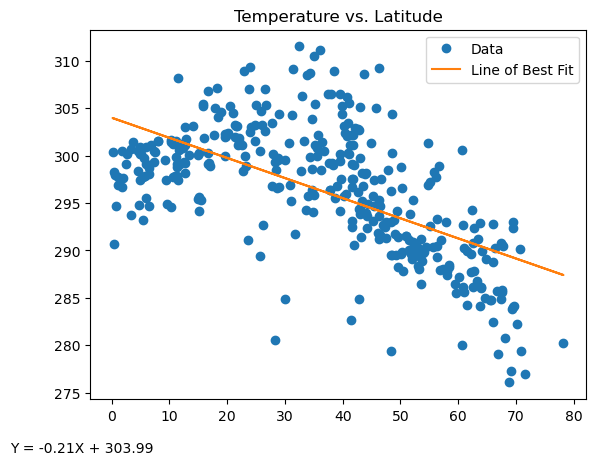

rvalue = -0.6151194355835392
pvalue = 4.656834786559148e-39


In [60]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
chart_title = 'Temperature vs. Latitude'

regress(x, y, chart_title)

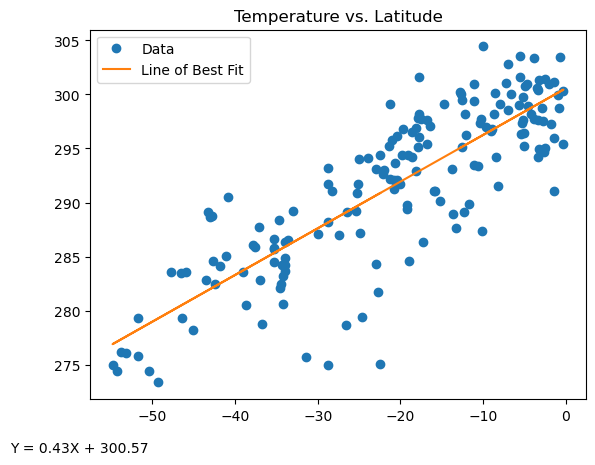

rvalue = 0.8346079174424698
pvalue = 2.2851831600512952e-45


In [61]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
chart_title = 'Temperature vs. Latitude'

regress(x, y, chart_title)

**Discussion about the linear relationship:** 
In the northern hemisphere, temperature decreases in general when latitude increases. This makes sense because temperatures in the northern part of the globe are lower than those towards the equator.

In the southern hemisphere, temperature increases as latitude increases. This is the opposite of what happens in the northern hemisphere. However, when we consider the shape of the globe, this also makes sense. Temperatures at the bottom of the globe (lowest lattitude) have the lower temperatures compared to areas near the equator.

When we take both of these effects together, we can see that temperature begins low at the bottom of the globe, steadily inceases to a maximum at the equator, then decreases once again towards the top of the globe.

As for the strength of the linear relationship, we can see that the data aligns fairly well with the regression line This suggests a moderately strong linear relationship between lattitude and logitude. The linear relationship is positive in the southern hemisphere, and negative in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

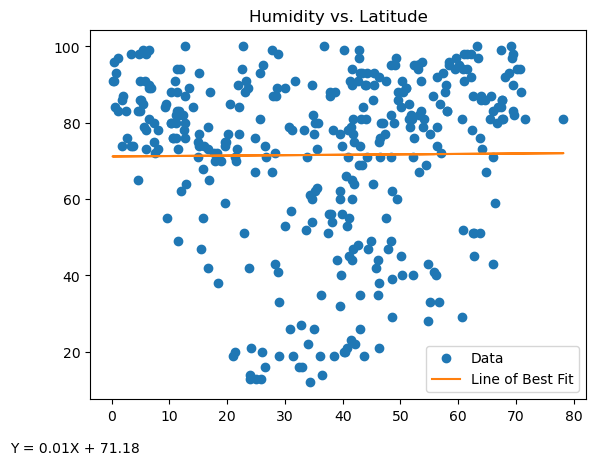

rvalue = 0.009516665646411446
pvalue = 0.8568034079371575


In [62]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
chart_title = 'Humidity vs. Latitude'

regress(x, y, chart_title)

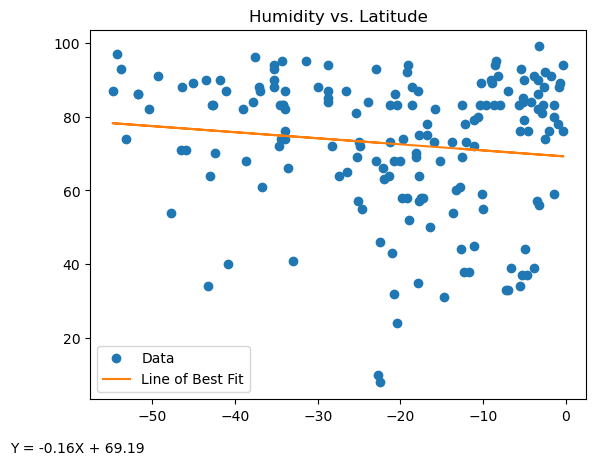

rvalue = -0.12741745097821539
pvalue = 0.09775842859023676


In [63]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
chart_title = 'Humidity vs. Latitude'

regress(x, y, chart_title)

**Discussion about the linear relationship:** In the above plots, we examine the relationship between humidity and latitude in the northern and southern hemispheres of the Earth. Due to the high dispersion of the data, there is no clear linear relationship between humidity and latitude in the nothern hemisphere. However, there does seem to be an accumulation of datapoints in the latitude ranges of 80 to 100. In summary, there is no clear linear relationship between humidity and latitude, but there does seem to be a clustering effect. 

Any relationship we glean from these graphs will be a weak and dubious one. That being said, humidity seems to increase as latitude increases, but not by much. There are many areas with high latitude and medium to low humidity.

In the southern hemisphere, there is also a large dispersion of data and therefore a weak linear relationship betwwen latitude and humidity. It can be said that there is a weak negative linear relationship between latitude and humidity in the southern hemisphere of the Earth.

### Cloudiness vs. Latitude Linear Regression Plot

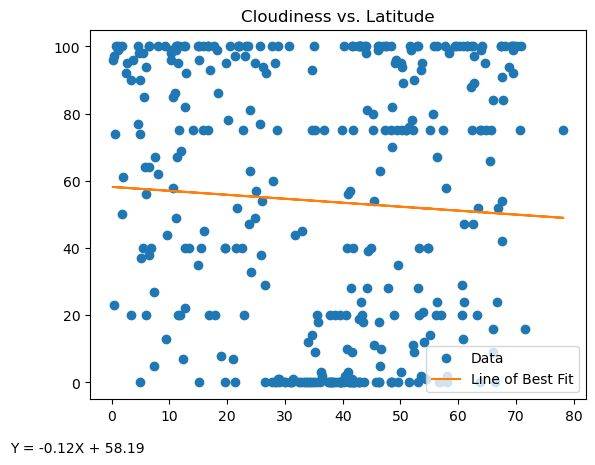

rvalue = -0.05850221847754531
pvalue = 0.2669205826216756


In [64]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
chart_title = 'Cloudiness vs. Latitude'

regress(x, y, chart_title)

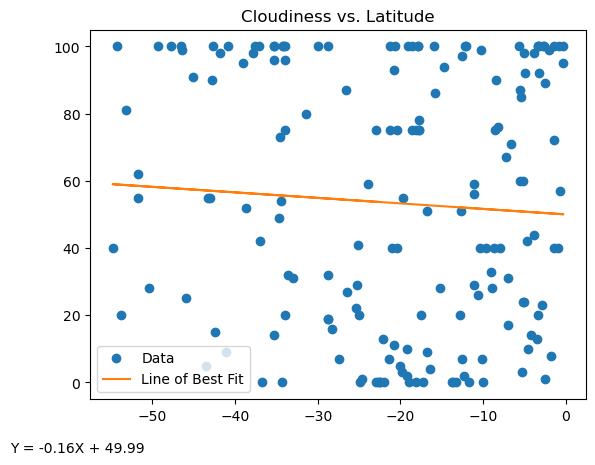

rvalue = -0.06354407306092137
pvalue = 0.4103754924763202


In [65]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
chart_title = 'Cloudiness vs. Latitude'

regress(x, y, chart_title)

**Discussion about the linear relationship:** There is no clear linear relationship between cloudiness and latitude in either the northern or southern hemisphere. Both Linear relationships are very weak due to the high dispersion of the data. However, there does seem to be a clustering of datapoints at the lowest and highest levels of latitude.

There is a very weak positive linear relationship between latitude and cloduiness in the nothern hemisphere, and a similarly weak but negative linear relationship between these two factors in the southern hemisphere.

When taken together, these two weak relationships loosely suggest that the Earth is more cloudy towards the north and south poles, and that regions near the equator are less cloudy. Due to the weakness of the linear relationships, this claim is somewhat dubious.

### Wind Speed vs. Latitude Linear Regression Plot

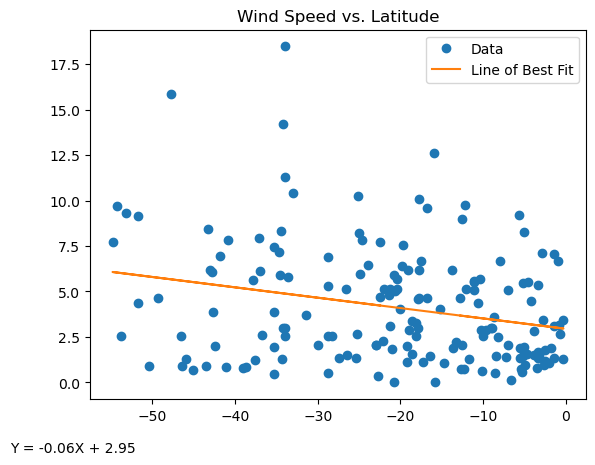

rvalue = -0.2578836828453477
pvalue = 0.0006857921494829497


In [66]:
# Northern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
chart_title = 'Wind Speed vs. Latitude'

regress(x, y, chart_title)

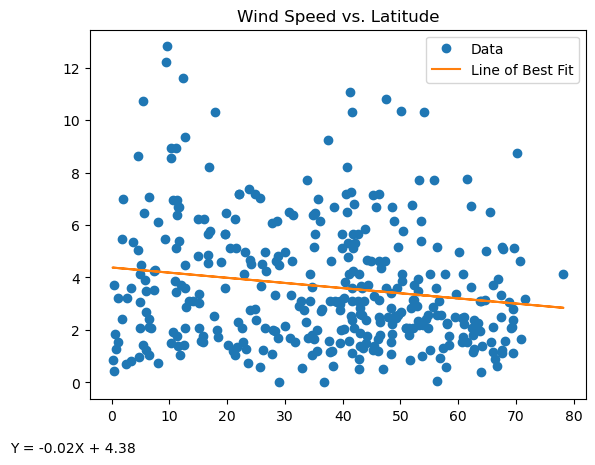

rvalue = -0.1628339845006678
pvalue = 0.0018824172909082753


In [67]:
# Southern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
chart_title = 'Wind Speed vs. Latitude'

regress(x, y, chart_title)

**Discussion about the linear relationship:** Overall, it is clear that wind speed is higher towards the equator.

There is a semi-strong negative relationship between latitude and wind speed in the northern hemisphere, and the same strength of a negative relationship between the two variables in the southern hemisphere. This suggests that wind speed increases with proximity to the equator.